# Diversified Portfolio using correlation matrix
It is well known that a well-diversified portfolio benefits from holding assets with low correlation across different groups, while assets within each group should ideally have high correlation.

This project focuses on constructing a portfolio based solely on the correlation matrix and analyzing its performance without considering other factors such as industry, market news, or external influences. Therefore, a high correlation between stocks in this project does not necessarily imply that these stocks are related in any specific way This serves as a test with many limitations, all of which have been addressed throughout the project.


We will fetch data from the SP500 using yfinance library (It would be ideal to use the entire stock market universe for a more comprehensive analysis ) It's suggested that using Adj Close is more optimal but unfortunately I could no longer fetch it, I will continue using Close price.

In [183]:
import pandas as pd
import requests
import yfinance as yf
import numpy as np
from io import StringIO
URL = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
response = requests.get(URL).text
table = pd.read_html(StringIO(response))
tickers = table[0]["Symbol"].tolist()
tickers = [ticker.replace('.', '-') for ticker in tickers]

price = yf.download(tickers, period="2y", interval="1d")
close = price["Close"]
close.dropna(axis=1)


[*********************100%***********************]  503 of 503 completed


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2023-03-22,131.850464,156.254211,142.504913,121.169998,93.035690,62.635689,246.368332,361.709991,180.122421,72.198296,...,219.861832,27.268793,103.501610,59.712704,97.679695,95.264450,122.823189,123.363052,288.109985,158.246567
2023-03-23,129.287033,157.343231,144.016479,120.300003,93.208580,62.378941,264.257233,369.000000,182.863708,70.472359,...,220.134354,26.786077,103.942032,58.930805,96.577667,94.932495,122.861679,122.939995,288.750000,158.109268
2023-03-24,130.105347,158.650040,146.538849,116.919998,94.178703,62.806850,264.587921,374.959991,181.164902,71.860603,...,220.163544,27.013237,104.313965,61.015869,96.689735,96.260338,123.006012,124.002556,288.730011,160.992188
2023-03-27,131.199768,156.699738,146.093735,117.910004,94.572510,63.120640,266.494476,373.149994,178.346405,72.929932,...,221.360611,27.164679,104.079063,60.773846,98.809753,97.060974,123.448647,123.963196,288.859985,162.492462
2023-03-28,130.765930,156.076004,146.752167,116.610001,93.275810,63.529530,267.506165,373.399994,177.217087,73.680336,...,223.248672,26.899658,104.930565,60.876236,100.042542,97.607727,123.650734,124.337776,290.149994,161.835464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-17,122.489998,214.000000,214.470001,126.940002,127.639999,95.279999,325.709991,399.339996,211.679993,47.990002,...,328.329987,29.959999,86.419998,69.959999,113.760002,123.080002,157.130005,111.790001,285.269989,165.169998
2025-03-18,123.099998,212.690002,213.850006,124.559998,126.300003,93.300003,324.070007,391.369995,209.160004,47.680000,...,334.970001,29.860001,85.430000,70.279999,113.639999,120.919998,157.300003,112.879997,282.579987,164.429993
2025-03-19,122.209999,215.240005,212.250000,126.000000,127.419998,93.190002,324.470001,387.890015,209.970001,46.930000,...,334.510010,29.910000,85.050003,70.239998,115.410004,121.309998,157.509995,112.910004,285.829987,163.750000


I then compute daily returns for the stock in order to compute a correlation matrix. For faster observation, I'll use the sort value to show top 100 pairs with highest correlation, as long as the correlation > = 0.8. Notice that several tickers are from the same corporation, for example FOX - FOXA, GOOGL -GOOG: we should filter the ticker before processing to the next step.

In [215]:
returns = close.pct_change()
correlation_matrix = returns.corr()
sorted = correlation_matrix.unstack().sort_values().drop_duplicates()
sorted = sorted.sort_values(ascending=False, kind="quicksort")
filter_table = sorted[:100]
filter_table

Ticker  Ticker
ZTS     ZTS       1.000000
GOOGL   GOOG      0.997718
FOX     FOXA      0.985148
NWSA    NWS       0.974723
AVB     EQR       0.917585
                    ...   
MAA     AVB       0.800615
RSG     WM        0.800541
DUK     WEC       0.800500
ESS     CPT       0.799879
FANG    DVN       0.799829
Length: 100, dtype: float64

then group tickers that show a high correlation into clusters. I will use nx.find_cliques(G) returns all maximal cliques, making sure that groups like A-B-C only exist if A is connected to C (forming a triangle/clique). In simple terms, if A-B and B-C are highly correlated, in order to form a group A-B-C, A-C must also have to be highly correlated.

In [216]:
import networkx as nx
G = nx.Graph()
for (ticker1, ticker2), correlation in filter.items():
    G.add_edge(ticker1, ticker2)
    
groups = list(nx.find_cliques(G))
groups

[['FOXA', 'FOX'],
 ['MLM', 'VMC'],
 ['DTE', 'CMS', 'PPL', 'LNT', 'WEC'],
 ['MAA', 'AVB', 'UDR', 'CPT'],
 ['WM', 'RSG'],
 ['NUE', 'STLD'],
 ['SBAC', 'AMT'],
 ['DVN', 'FANG'],
 ['DVN', 'EOG'],
 ['VLO', 'PSX'],
 ['VLO', 'MPC'],
 ['LOW', 'HD'],
 ['NCLH', 'CCL'],
 ['PSA', 'EXR'],
 ['PPL', 'EVRG', 'LNT'],
 ['NWS', 'NWSA'],
 ['CPT', 'ESS', 'EQR', 'AVB', 'UDR'],
 ['EXC', 'AEE'],
 ['DAL', 'UAL'],
 ['SYF', 'COF'],
 ['LYB', 'DOW'],
 ['GOOGL', 'GOOG'],
 ['FRT', 'KIM', 'REG'],
 ['WMB', 'KMI'],
 ['PHM', 'NVR', 'LEN', 'DHI'],
 ['MET', 'PRU'],
 ['CDNS', 'SNPS'],
 ['ED', 'CMS', 'WEC'],
 ['EOG', 'COP'],
 ['HAL', 'SLB'],
 ['LRCX', 'AMAT', 'KLAC'],
 ['DUK', 'WEC'],
 ['DUK', 'SO'],
 ['WEC', 'AEE', 'LNT'],
 ['MA', 'V'],
 ['NXPI', 'ADI', 'MCHP'],
 ['MS', 'GS'],
 ['CVX', 'HES'],
 ['HLT', 'MAR'],
 ['TXN', 'ADI'],
 ['CFG', 'HBAN', 'TFC'],
 ['CFG', 'HBAN', 'RF', 'FITB', 'PNC', 'MTB'],
 ['CFG', 'HBAN', 'RF', 'FITB', 'USB'],
 ['CFG', 'HBAN', 'RF', 'FITB', 'KEY'],
 ['ZTS']]

Naming the groups with numbers for easier tracking

In [213]:
group_names = [i + 1 for i in range(len(groups))]
named_groups = {group_name: groups for group_name, groups in zip(group_names, groups)}
for name, group in named_groups.items():
    print(f"{name}: {group}")

1: ['FOXA', 'FOX']
2: ['MLM', 'VMC']
3: ['DTE', 'CMS', 'PPL', 'LNT', 'WEC']
4: ['MAA', 'AVB', 'UDR', 'CPT']
5: ['WM', 'RSG']
6: ['NUE', 'STLD']
7: ['SBAC', 'AMT']
8: ['DVN', 'FANG']
9: ['DVN', 'EOG']
10: ['VLO', 'PSX']
11: ['VLO', 'MPC']
12: ['LOW', 'HD']
13: ['NCLH', 'CCL']
14: ['PSA', 'EXR']
15: ['PPL', 'EVRG', 'LNT']
16: ['NWS', 'NWSA']
17: ['CPT', 'ESS', 'EQR', 'AVB', 'UDR']
18: ['EXC', 'AEE']
19: ['DAL', 'UAL']
20: ['SYF', 'COF']
21: ['LYB', 'DOW']
22: ['GOOGL', 'GOOG']
23: ['FRT', 'KIM', 'REG']
24: ['WMB', 'KMI']
25: ['PHM', 'NVR', 'LEN', 'DHI']
26: ['MET', 'PRU']
27: ['CDNS', 'SNPS']
28: ['ED', 'CMS', 'WEC']
29: ['EOG', 'COP']
30: ['HAL', 'SLB']
31: ['LRCX', 'AMAT', 'KLAC']
32: ['DUK', 'WEC']
33: ['DUK', 'SO']
34: ['WEC', 'AEE', 'LNT']
35: ['MA', 'V']
36: ['NXPI', 'ADI', 'MCHP']
37: ['MS', 'GS']
38: ['CVX', 'HES']
39: ['HLT', 'MAR']
40: ['TXN', 'ADI']
41: ['CFG', 'HBAN', 'TFC']
42: ['CFG', 'HBAN', 'RF', 'FITB', 'PNC', 'MTB']
43: ['CFG', 'HBAN', 'RF', 'FITB', 'USB']
44: ['CFG', '

After forming different groups, check the correlation BETWEEN groups. 

In [233]:
#correlation between group
group_returns = {}
for name, group in named_groups.items():
    close_group = close[group]
    print(close_group)
    returns_group = close_group.pct_change()  
    group_avg_return = returns_group.mean(axis=1) 
    group_returns[name] = group_avg_return
    
group_returns_df = pd.DataFrame(group_returns)
corr_group_matrix = group_returns_df.corr()
corr_group_matrix

Ticker           FOXA        FOX
Date                            
2023-03-22  32.387810  29.646210
2023-03-23  32.728020  29.975935
2023-03-24  32.135086  29.461950
2023-03-27  32.689140  30.043821
2023-03-28  31.843475  29.219505
...               ...        ...
2025-03-17  52.459999  48.669998
2025-03-18  52.380001  48.450001
2025-03-19  52.939999  49.080002
2025-03-20  53.209999  49.400002
2025-03-21  53.400002  49.700001

[502 rows x 2 columns]
Ticker             MLM         VMC
Date                              
2023-03-22  324.465973  161.189774
2023-03-23  329.495636  161.967621
2023-03-24  332.835510  163.641464
2023-03-27  335.039093  163.247620
2023-03-28  341.995636  165.453110
...                ...         ...
2025-03-17  488.730011  235.080002
2025-03-18  488.190002  236.500000
2025-03-19  490.200012  241.110001
2025-03-20  483.779999  238.720001
2025-03-21  477.029999  234.080002

[502 rows x 2 columns]
Ticker             DTE        CMS        PPL        LNT         WEC


,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
1,1.000000,0.078446,0.224027,0.313661,0.091752,0.218559,0.152032,0.247085,0.220644,0.233498,...,0.226989,0.399320,0.218669,0.287313,0.245732,0.419684,0.428129,0.428567,0.420585,0.168026
2,0.078446,1.000000,0.138142,0.282174,0.192897,0.393500,0.139464,0.152372,0.124306,0.155477,...,0.307824,0.448155,0.104575,0.437550,0.323112,0.367864,0.375596,0.373188,0.360986,0.173678
3,0.224027,0.138142,1.000000,0.567988,0.345010,0.059595,0.562721,0.124387,0.164774,0.163030,...,0.011000,0.241106,0.173240,0.089084,0.064345,0.294621,0.317680,0.314282,0.305237,0.278750
4,0.313661,0.282174,0.567988,1.000000,0.345225,0.146568,0.529805,0.177059,0.207940,0.135546,...,0.232865,0.393139,0.196433,0.263604,0.275450,0.475620,0.491401,0.498653,0.473517,0.343800
5,0.091752,0.192897,0.345010,0.345225,1.000000,0.091782,0.135406,0.102207,0.115735,0.049398,...,0.096281,0.160726,0.140106,0.245793,0.148355,0.082339,0.105052,0.105897,0.087134,0.159507
6,0.218559,0.393500,0.059595,0.146568,0.091782,1.000000,0.068510,0.351710,0.339624,0.399015,...,0.366427,0.505092,0.339416,0.347253,0.357933,0.440216,0.439849,0.438453,0.440815,0.127014
7,0.152032,0.139464,0.562721,0.529805,0.135406,0.068510,1.000000,0.054974,0.100864,0.096501,...,0.102616,0.176331,0.097611,0.045394,0.127042,0.279544,0.269535,0.288801,0.270375,0.323623
8,0.247085,0.152372,0.124387,0.177059,0.102207,0.351710,0.054974,1.000000,0.938834,0.589718,...,0.236048,0.352009,0.765723,0.186128,0.259539,0.389360,0.381436,0.394056,0.399844,0.077818
9,0.220644,0.124306,0.164774,0.207940,0.115735,0.339624,0.100864,0.938834,1.000000,0.601200,...,0.215971,0.335011,0.795911,0.170765,0.244372,0.375009,0.380938,0.392655,0.397262,0.110998
10,0.233498,0.155477,0.163030,0.135546,0.049398,0.399015,0.096501,0.589718,0.601200,1.000000,...,0.189799,0.325001,0.596321,0.198639,0.197684,0.366692,0.367139,0.374322,0.381281,0.081671


Similar to the previous step, to speed up the process, I will sort the values from lowest to highest. I'll adjust the top number to 65, as long as the correlation remains low, approximately around 0

In [243]:
e = corr_group_matrix.unstack().sort_values().drop_duplicates()
e = e.sort_values(ascending=True, kind="quicksort")
filter_group = e[:145]
filter_group

32  31   -0.234077
27  33   -0.231035
33  31   -0.228233
28  31   -0.226507
27  32   -0.223283
            ...   
20  45    0.097556
38  7     0.097611
15  30    0.098666
32  8     0.099192
19  5     0.099326
Length: 145, dtype: float64

Still similar to the previous step, I then group groups that show a low correlation into cluster(portfolio). Each cluster down below will represent a portfolio.

In [245]:
G = nx.Graph()

for (group1, group2), correlation in filter_group.items():
    G.add_edge(group1, group2)
    
clusters = list(nx.find_cliques(G))
for cluster in clusters:
    print(cluster)


[2, 32]
[2, 33]
[2, 1]
[36, 32]
[36, 33]
[36, 34]
[36, 3]
[36, 5]
[36, 15]
[36, 18]
[36, 28]
[6, 32]
[6, 33]
[6, 34]
[6, 3]
[6, 5]
[6, 7]
[6, 15]
[6, 18]
[6, 28]
[39, 32]
[39, 33]
[39, 34]
[39, 3]
[39, 7]
[39, 18]
[39, 28]
[40, 32]
[40, 33]
[40, 34]
[40, 3]
[40, 15]
[40, 18]
[40, 28]
[41, 5]
[44, 5]
[13, 32]
[13, 33]
[13, 34]
[13, 3]
[13, 38]
[13, 9]
[13, 10]
[13, 11]
[13, 18]
[13, 28]
[13, 29]
[45, 27, 8]
[45, 27, 10]
[45, 27, 11]
[45, 27, 29]
[45, 20]
[16, 32]
[16, 33]
[16, 18]
[16, 28]
[19, 32]
[19, 33]
[19, 5, 11]
[19, 7, 11]
[19, 7, 29]
[19, 28]
[20, 32]
[20, 33]
[20, 34]
[20, 5]
[20, 7]
[20, 18]
[20, 28]
[21, 5]
[22, 1, 5]
[22, 3]
[22, 4]
[22, 5, 10]
[22, 5, 11]
[22, 38, 7]
[22, 8, 32]
[22, 8, 33]
[22, 8, 28]
[22, 8, 7]
[22, 9]
[22, 10, 7]
[22, 11, 7]
[22, 12]
[22, 14]
[22, 17]
[22, 23]
[22, 29, 7]
[22, 30, 32]
[22, 30, 33]
[22, 30, 34]
[22, 30, 7]
[22, 30, 15]
[22, 30, 18]
[22, 30, 28]
[27, 32, 8]
[27, 1]
[27, 33, 8]
[27, 3]
[27, 4]
[27, 34]
[27, 7, 38]
[27, 7, 8]
[27, 7, 10]
[2

We could use a heatmap to check correlation between groups.

<Axes: >

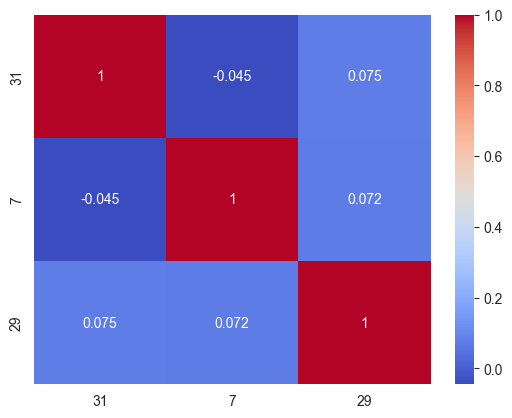

In [265]:
import seaborn as sns
chosen = [31, 7, 29]
filtered_corr_matrix = corr_group_matrix.loc[chosen, chosen]
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm')

TEST: I'll randomly select a portfolio to see its performance. Ideally, each portfolio should be compared to the benchmark. I will choose the portfolio that has [31,7,29]

In [259]:
list_final = ['LRCX', 'AMAT', 'KLAC','SBAC','AMAT','COP','EOG']
len(list_final)

7

TEST: From only a list of 7 stocks, let's compute the daily returns then compare it with the benchmark SP500

In [260]:
close_list = close[list_final ]
returns_list = close_list.pct_change()
list_avg_return = returns_list.mean(axis=1).dropna()

sp500_df = yf.download("^GSPC", period="2y", interval="1d")['Close']
sp500_returns = sp500_df.pct_change().dropna()
comparison = pd.concat([list_avg_return, sp500_returns], axis=1)


comparison.columns = ['portfolio_return', 'spx_index_return']
comparison


[*********************100%***********************]  1 of 1 completed


,portfolio_return,spx_index_return
Date,,
2023-03-23,0.013186,0.002985
2023-03-24,-0.013482,0.005640
2023-03-27,0.000312,0.001647
2023-03-28,-0.006210,-0.001574
2023-03-29,0.030497,0.014237
...,...,...
2025-03-17,0.001951,0.006416
2025-03-18,-0.004996,-0.010654
2025-03-19,0.006502,0.010798


I will plot a line chart to observe the trend. Since I'm using daily returns, the chart may appear a bit difficult to interpret, but it seems that the portfolio moves fairly in line with the benchmark.

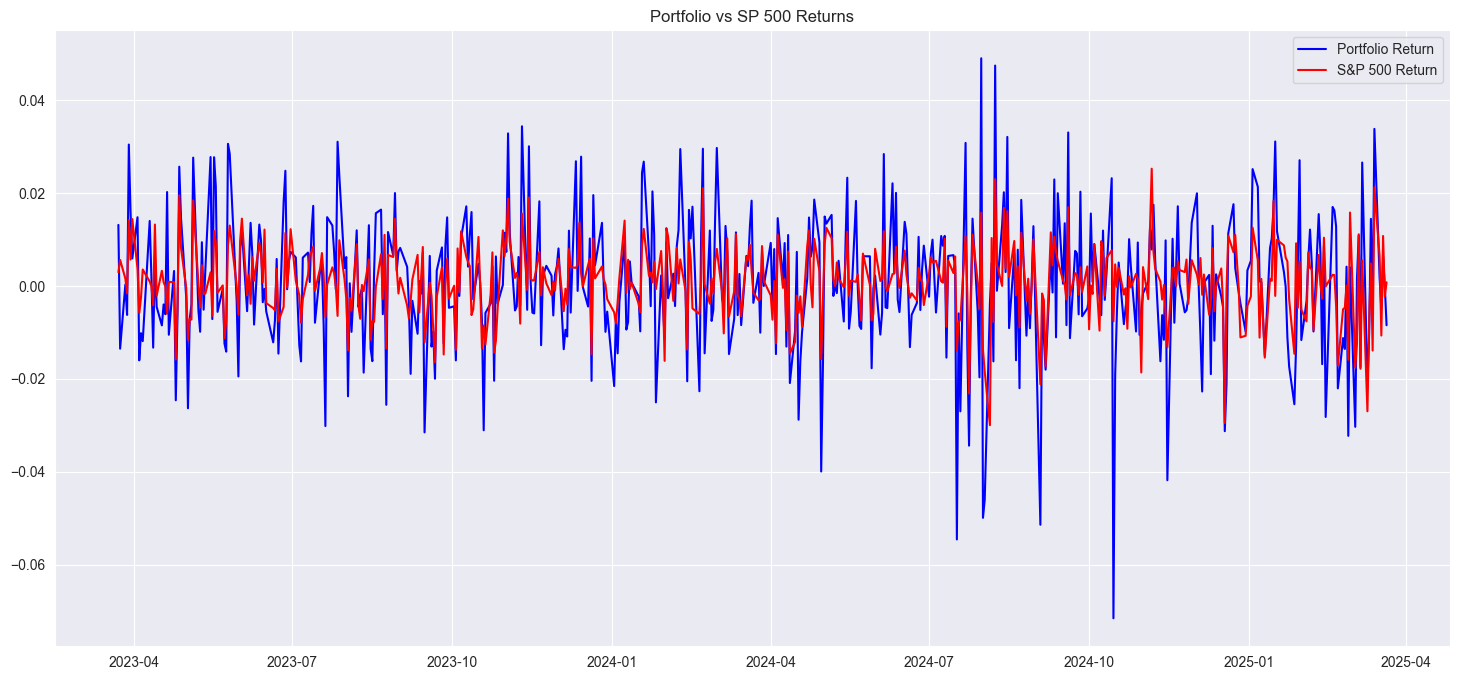

In [269]:
import matplotlib.pyplot as plt

plt.figure(figsize = (18,8))
plt.plot(comparison.index, comparison['portfolio_return'], label='Portfolio Return', color='blue')
plt.plot(comparison.index, comparison['spx_index_return'], label='S&P 500 Return', color='red')
plt.title("Portfolio vs SP 500 Returns")
plt.legend()
plt.grid(True)
plt.show()

Final step: I will compute additional key metrics to evaluate how this 9-stock portfolio performs compared to the SP 500

In [268]:
annual_portfolio_return = comparison['portfolio_return'].mean() * 25200  # annualized (252 trading days in a year)
annual_sp500_return = comparison['spx_index_return'].mean() * 25200 
annual_excess_return = annual_portfolio_return - annual_sp500_return  

#annual volatility
annual_volatility = comparison['portfolio_return'].std() * np.sqrt(252)*100  
annual_volatility_sp500 = comparison['spx_index_return'].std() * np.sqrt(252)*100

#beta
covariance = np.cov(comparison['portfolio_return'], comparison['spx_index_return'])[0, 1]
variance_sp500 = np.var(comparison['spx_index_return'])
beta = covariance / variance_sp500

print(f"Portfolio Annual Return: {annual_portfolio_return:.2f}%")
print(f"SP500 Annual Return: {annual_sp500_return:.2f}%")
print(f"Portfolio Annual Excess Return: {annual_excess_return:.2f}%")
print(f"Portfolio Annual Volatility: {annual_volatility:.2f}%")
print(f"Sp500 Annual Volatility: {annual_volatility_sp500:.2f}%")
print(f"Beta of the portfolio relative to S&P 500 {beta:.2f}")

Portfolio Annual Return: 19.89%
SP500 Annual Return: 19.14%
Portfolio Annual Excess Return: 0.75%
Portfolio Annual Volatility: 23.57%
Sp500 Annual Volatility: 12.70%
Beta of the portfolio relative to S&P 500 1.30


In [264]:
corr_comparison = comparison.corr()
corr_comparison

,portfolio_return,spx_index_return
portfolio_return,1.000000,0.700791
spx_index_return,0.700791,1.000000


# Summary:
In summary,In summary, for better diversification, a portfolio should include a broader range of assets. We should use the total stock market, to ensure a larger and more representative sample. All limitations have been addressed throughout each step of the process.
P.S. Ideally, every portfolio would be compared against the benchmark—perhaps in the next phase. The project is ongoing.